In [1]:
import numpy as np
import utils
import qiskit
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

In [24]:
provider = qiskit.IBMQ.load_account()
simulator = qiskit.Aer.get_backend('qasm_simulator')

/home/user/.local/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-04-22 17:00:09,544: Credentials are already in use. The existing account in the session will be replaced.


## Balance by adding H CNOT

### Without balancing

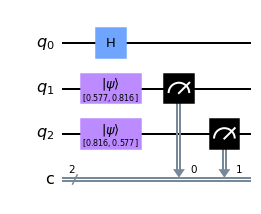

In [58]:
from math import sqrt

circuit = qiskit.QuantumCircuit(3, 2)
circuit.h(0)
circuit.initialize([sqrt(1/3), sqrt(2/3)], 1)
circuit.initialize([sqrt(2/3), sqrt(1/3)], 2)
circuit.measure([1, 2], [0, 1])
circuit.draw('mpl')

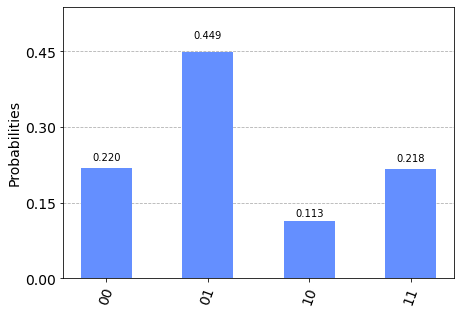

In [59]:
job_sim = qiskit.execute(circuit, simulator, shots=8192)
sim_result = job_sim.result().get_counts()
qiskit.visualization.plot_histogram(sim_result)

### With balancing

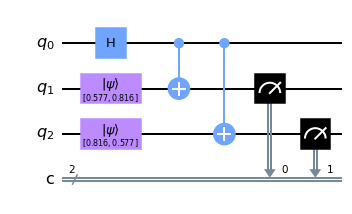

In [66]:
circuit = qiskit.QuantumCircuit(3, 2)
circuit.h(0)
circuit.initialize([sqrt(1/3), sqrt(2/3)], 1)
circuit.initialize([sqrt(2/3), sqrt(1/3)], 2)
circuit.cnot(0, 1)
circuit.cnot(0, 2)
circuit.measure([1, 2], [0, 1])
circuit.draw('mpl')

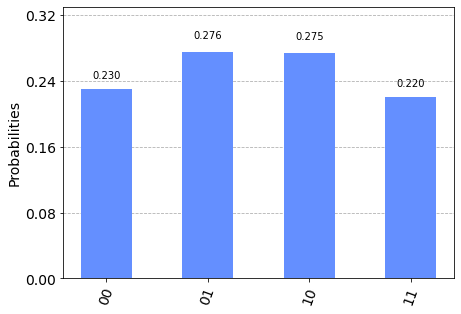

In [67]:
job_sim = qiskit.execute(circuit, simulator, shots=8192)
sim_result = job_sim.result().get_counts()
qiskit.visualization.plot_histogram(sim_result)

## Testing on real computer

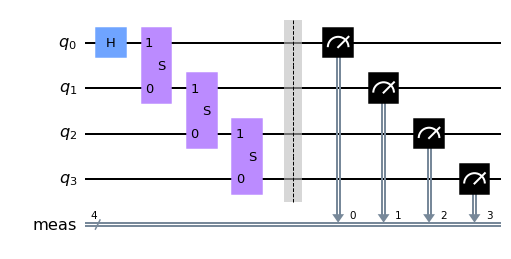

In [45]:
linear_interactions = {(i, i + 1): 1 for i in range(3)}
linear_circ = utils.linear_circuit(4, linear_interactions)
linear_circ.measure_all()
linear_circ.draw('mpl')

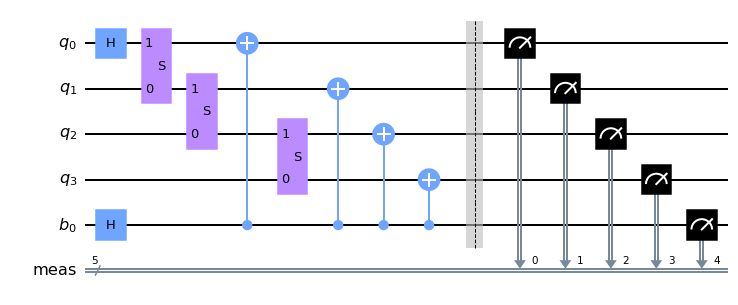

In [48]:
linear_circ_balanced = utils.linear_circuit(4, linear_interactions)
utils.add_h_cnot_to_all(linear_circ_balanced)
linear_circ_balanced.measure_all()
linear_circ_balanced.draw('mpl')

In [50]:
utils.run_and_write_to_csv(linear_circ, 'ibmq_lima', provider, result_file_name='measured_data/lima4.csv')

Job Status: job has successfully run


In [55]:
lima4_result = utils.result_from_csv('measured_data/lima4.csv')
lima4_balanced_result = utils.result_from_csv('measured_data/lima4_balanced.csv')
lima4_balanced_result = utils.process_balanced_result(lima4_balanced_result) 

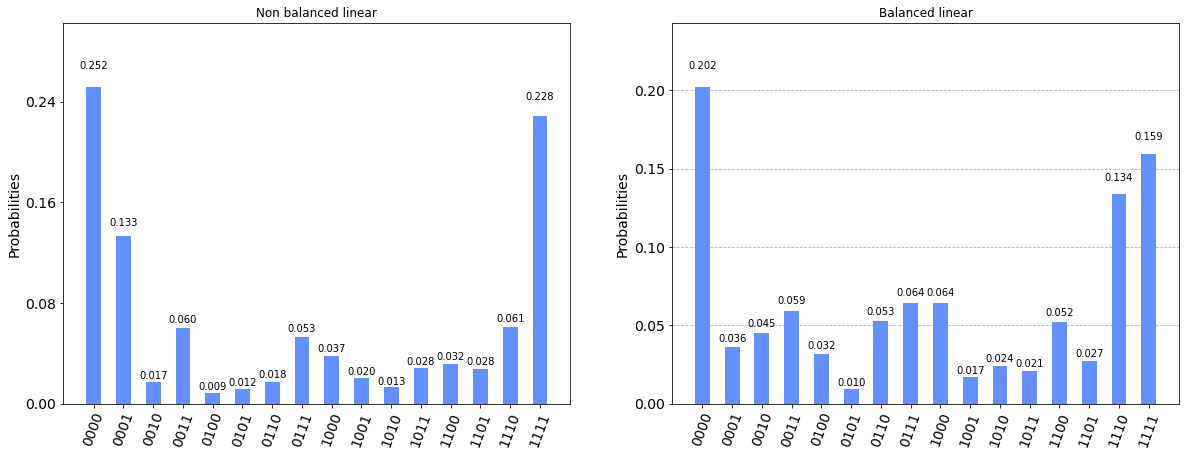

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Non balanced linear')
ax2.set_title('Balanced linear')
fig.set_size_inches(20, 7)

qiskit.visualization.plot_histogram(lima4_result, ax=ax1)
qiskit.visualization.plot_histogram(lima4_balanced_result, ax=ax2)